In [16]:
import string
import random
from IPython.display import display, clear_output
from PIL import Image, ImageOps, ImageDraw, ImageFont, ImageChops
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets
from ipywidgets import interactive, HBox, VBox
from img_processing import preprocess_img, DITHER_MODES
from non_mono_char_art_utils import *
from non_mono_char_art_algorithms import *
from generate_char_palette import *
from mono_char_art_conversion_wxh import *
from skimage import metrics

In [17]:
FONT = ImageFont.truetype("fonts/OpenSans-Regular.ttf", 22)

CHAR_SET = get_asciis()

IMG_PATH = "imgs/irad_grad.bmp"

In [18]:
orig_img = Image.open(IMG_PATH).convert("L")
#orig_img = ImageOps.invert(orig_img)

print(orig_img.size)

(512, 512)


In [20]:
def i_preprocess_img(scale_factor, contrast, brightness, quantize_colors, eq, dither):
    proc_img = preprocess_img(orig_img, scale_factor, contrast, brightness, eq, quantize_colors, dither)
    plt.imshow(proc_img, cmap='gray', vmin=0, vmax=255, interpolation='none')

    plt.figure(figsize=(9, 3))
    plt.xticks([x for x in range(0, len(proc_img.histogram()), 25)])
    plt.bar([x for x in range(0, len(proc_img.histogram()))], proc_img.histogram())
    plt.grid()
    plt.show()

    return proc_img

interactive_preprocess = interactive(i_preprocess_img,
            scale_factor=(0.01, 1, 0.01),
            contrast=(0, 2, 0.01),
            brightness=(0, 2, 0.01),
            eq=(0, 1, 0.01),
            quantize_colors=(1, 256, 1),
            dither=DITHER_MODES)

controls = VBox(interactive_preprocess.children[:-1])
#display(HBox((controls, interactive_preprocess.children[-1])))

In [21]:
proc_img = interactive_preprocess.result

In [7]:
all_lines = split_lines(proc_img, CHAR_SET, FONT)
print(len(all_lines))
lines = [all_lines[len(all_lines) // 4], all_lines[len(all_lines) // 2], all_lines[-len(all_lines) // 4]]
for l in all_lines:
    display(l)

9


          __]]@@@]]]]_          
      _@@@@@@@@]_     
   ]@@@@@@@@@@]   
  @@@@@@@@@@@]] 
 @@@@@@@@@@@@]
 @@@@@@@@@@@@]
 @@@@@@@@@@@]]]'
   @@@@@@@@@@]]]' 
     "@@@@@@@@]]]''    

0.6046127020143994


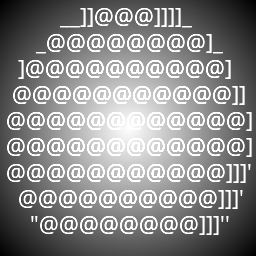

In [8]:
text = greedy_algorithm(proc_img, CHAR_SET, FONT)
print(''.join(text))

bg_img, draw = new_img_draw(proc_img.size)
draw_text_arr(draw, text, FONT)
print(evaluate_text_arr(text, proc_img, FONT))
ImageChops.add(proc_img, bg_img)

4 0.6024895163143382


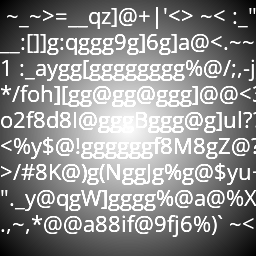

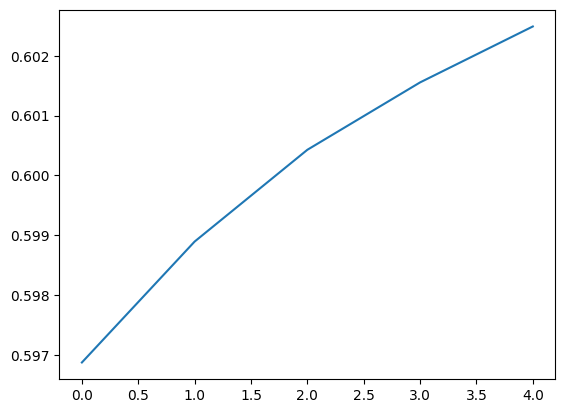

 ~_~>=__qz]@+|'<> ~< :_
__:[]]g:qggg9g]6g]a@<.~~m
1 :_aygg[gggggggg%@/;,-
*/foh][gg@gg@ggg]@@<3
o2f8d8I@gggBggg@g]ul?
<%y$@!ggggggf8M8gZ@
>/#8K@)g(NggJg%g@$yu+
"._y@qgW]gggg%@a@%
.,~,*@@a88if@9fj6%)` ~<

0.6032559862323836


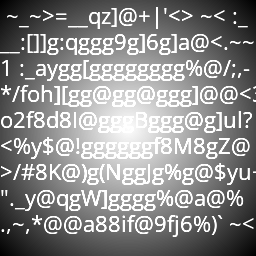

In [9]:
line_finders = [HarmonyLineSearch(line, CHAR_SET, FONT, 15, 0.9, 0.3, len(CHAR_SET)//4, False) for line in all_lines]
phs = pool_evolutionary_search(HarmonyLineSearch, line_finders, 1000, CHAR_SET)

res_history = []
for i in range(5):
    text = next(phs)
    clear_output()
    res_history.append(evaluate_text_arr(text, proc_img, FONT))
    print(i, res_history[-1])
    bg_img, draw = new_img_draw(proc_img.size)
    draw_text_arr(draw, text, FONT)
    display(ImageChops.add(proc_img, bg_img))
    plt.plot(res_history)
    plt.show()

for i in range(len(text)):
    text[i] = text[i][:find_end_of_line(text[i], proc_img, FONT)] + '\n'
print(''.join(text))

bg_img, draw = new_img_draw(proc_img.size)
draw_text_arr(draw, text, FONT)
print(evaluate_text_arr(text, proc_img, FONT))
ImageChops.add(proc_img, bg_img)

4 0.5964778526156556


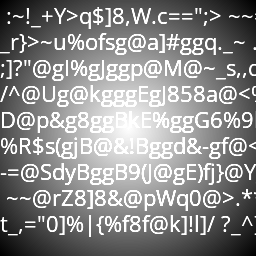

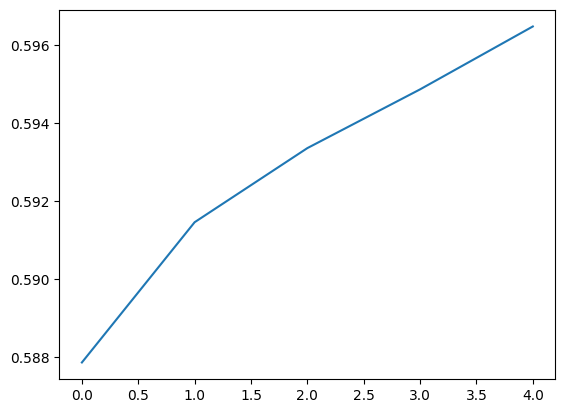

 :~!_+Y>q$]8,W.c==";> ~~=
_r}>~u%ofsg@a]#ggq._~ .
;]?"@gI%gJggp@M@~_s,,
/^@Ug@kgggEgJ858a@<
D@p&g8ggBkE%ggG6%9
%R$s(gjB@&!Bggd&-gf@<
-=@SdyBggB9(J@gE)fj}@
 ~~@rZ8]8&@pWq0@>.*
t_,="0]%|{%f8f@k]!l]/ ?_^

0.5968688366459864


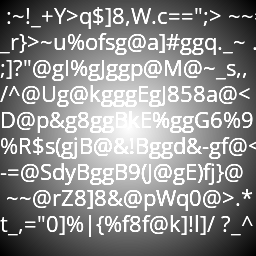

In [10]:
line_finders = [GeneticLineSearch(line, CHAR_SET, FONT, 100, 0.3, len(CHAR_SET)//4, False) for line in all_lines]
pgs = pool_evolutionary_search(GeneticLineSearch, line_finders, 12, CHAR_SET)

res_history = []
for i in range(5):
    text = next(pgs)
    clear_output()
    res_history.append(evaluate_text_arr(text, proc_img, FONT))
    print(i, res_history[-1])
    bg_img, draw = new_img_draw(proc_img.size)
    draw_text_arr(draw, text, FONT)
    display(ImageChops.add(proc_img, bg_img))
    plt.plot(res_history)
    plt.show()

for i in range(len(text)):
    text[i] = text[i][:find_end_of_line(text[i], proc_img, FONT)] + '\n'
print(''.join(text))

bg_img, draw = new_img_draw(proc_img.size)
draw_text_arr(draw, text, FONT)
print(evaluate_text_arr(text, proc_img, FONT))
ImageChops.add(proc_img, bg_img)

4 0.5878597483915441


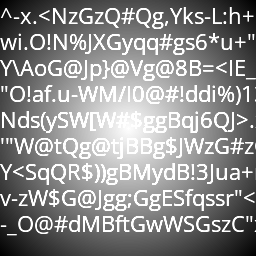

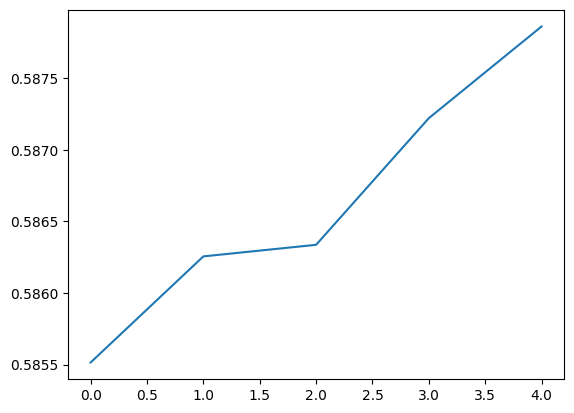

^-x.<NzGzQ#Qg,Yks-L:h+o
wi.O!N%JXGyqq#gs6*u+"
Y\AoG@Jp}@Vg@8B=<IE
"O!af.u-WM/I0@#!ddi%)13
Nds(ySW[W#$ggBqj6QJ>.
'"W@tQg@tjBBg$JWzG#zC
Y<SqQR$))gBMydB!3Jua+
v-zW$G@Jgg;GgESfqssr"
-_O@#dMBftGwWSGszC"

0.588021790747549


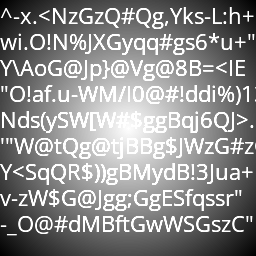

In [11]:

line_finders = [ParticleSwarmLineSearch(line, CHAR_SET, FONT, 100, 0.3, 2, 1, False) for line in all_lines]
pps = pool_evolutionary_search(ParticleSwarmLineSearch, line_finders, 10, CHAR_SET)
res_history = []
for i in range(5):
    text = next(pps)
    clear_output()
    res_history.append(evaluate_text_arr(text, proc_img, FONT))
    print(i, res_history[-1])
    bg_img, draw = new_img_draw(proc_img.size)
    draw_text_arr(draw, text, FONT)
    display(ImageChops.add(proc_img, bg_img))
    plt.plot(res_history)
    plt.show()

for i in range(len(text)):
    text[i] = text[i][:find_end_of_line(text[i], proc_img, FONT)] + '\n'
print(''.join(text))

bg_img, draw = new_img_draw(proc_img.size)
draw_text_arr(draw, text, FONT)
print(evaluate_text_arr(text, proc_img, FONT))
ImageChops.add(proc_img, bg_img)


In [14]:
W_H_WIN_SHAPE = (FONT.size, FONT.size)
char_to_brightness_map = generate_non_mono_multi_char_brightness_map(CHAR_SET, FONT, W_H_WIN_SHAPE[0], W_H_WIN_SHAPE[1], normalize=True, prune=0.8)
print(len(char_to_brightness_map))

129


-+>->;>;>;@@;>>;>->-
-+>;,a@@@@@@;>>-
>;,a@@@@@@@@;>
>;@@@@@@@@@@
>)@@@@@@@@@@
>)@@@@@@@@@@
>)@@@@@@@@@@
>;@@@@@@@@@@
>;@@@@@@@@@]>
>`>;@@@@@@@]>>`
>`>`>`@@@@@]>>`>`



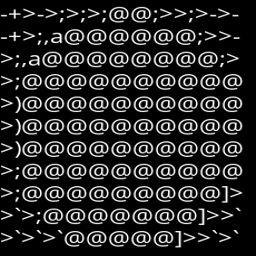

0.596597349877451


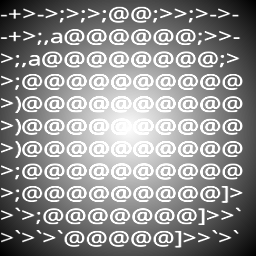

In [22]:
text = quantize_grayscale_wxh(proc_img, char_to_brightness_map, (W_H_WIN_SHAPE[1], W_H_WIN_SHAPE[0]), DITHER_MODES.FS, 0.0)

num_lines = len(text)
for i in range(len(text)):
    text[i] = ''.join(text[i]) + '\n'
text = ''.join(text)
print(text)

text_box = FONT.getbbox(text)
bg_img, draw = new_img_draw((int(text_box[2]/num_lines), text_box[3]*num_lines))
draw_text_arr(draw, text, FONT)
bg_img = bg_img.resize(proc_img.size)
display(bg_img)
print(evaluate_text_arr(text, proc_img, FONT))
ImageChops.add(proc_img, bg_img)

.+.+.+>-]>]>]>]>]>]>>->-
.+.+c]@@@@@@@]>>-
.+c]@@@@@@@@@]>
>)9]@@@@@@@@@]>
c]@@@@@@@@@@@
c]@@@@@@@@@@@
>)9]@@@@@@@@@@
>`9]@@@@@@@@@]>
>`>`9]9]@@@@@@]>>`

0.6016800824333639


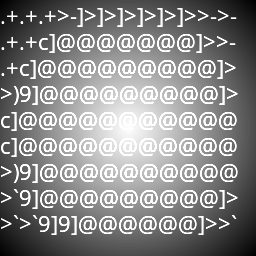

In [23]:
palette = list(char_to_brightness_map.keys())
text = greedy_algorithm(proc_img, palette, FONT)
print(''.join(text))

bg_img, draw = new_img_draw(proc_img.size)
draw_text_arr(draw, text, FONT)
print(evaluate_text_arr(text, proc_img, FONT))
ImageChops.add(proc_img, bg_img)